In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
amypro = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/au24/datasets/amypro22.csv')
amypro = amypro[amypro['dataset'] == 'amypro22'].reset_index()
amypro_dataset = amypro['dataset']
amypro = list(amypro['sequence'])

serrano = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/sbxw_files_2/fibrillatioNN_prediction/sbxw/tables/serrano_filteredlysozyme_filteredwaltzoverlap_filteredlt6.csv')
serrano['dataname'] = 'serrano'
serrano_dataset = serrano['dataname']
serrano = list(serrano['sequence'])

serrano_amypro = serrano + amypro
labels = list(serrano_dataset) + list(amypro_dataset)
serrano_labels = list(serrano_dataset)
amypro_labels = list(amypro_dataset)

In [4]:
def write_fasta_file(file_path, sequences, identifier):
    with open(file_path, 'w') as f:
        for i, sequence in enumerate(sequences):
            f.write(f">{identifier[i]}_{i}\n{sequence}\n")

In [5]:
write_fasta_file('serrano_amypro.fa', serrano_amypro, labels)
write_fasta_file('serrano.fa', serrano, serrano_labels)
write_fasta_file('amypro.fa', amypro, amypro_labels)

In [5]:
# needleall -stdout -asequence /novo/projects/departments/cdd/public/users/ehec/au24/2503_jobs_for_paper/serrano.fa -bsequence /novo/projects/departments/cdd/public/users/ehec/au24/2503_jobs_for_paper/amypro.fa -outfile /novo/projects/departments/cdd/public/users/ehec/au24/2503_jobs_for_paper/amyproserrano_align

In [17]:
alignment = pd.read_csv('amypro22serrano_align.csv', sep=' ')
alignment['score'] = alignment['score'].str.replace(r'||', '', regex=True).astype(float)

colors = ['darkblue', 'green', 'orange']
cycling_list = list(itertools.islice(itertools.cycle(colors), 22))

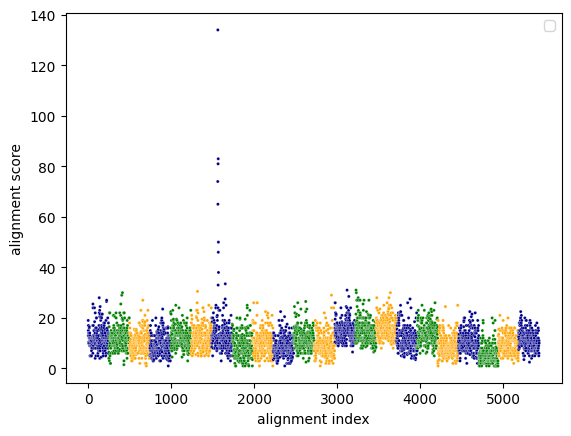

In [18]:
sns.scatterplot(y=alignment['score'], x=range(len(alignment['score'])), hue=alignment['seq1'], palette=cycling_list, s=5)
plt.xlabel('alignment index')
plt.ylabel('alignment score')
plt.legend('')